<a href="https://colab.research.google.com/github/sunnyiisc/Three-Phase-Inverter-12VDC-to-440VAC-3ph-50Hz/blob/main/3_phase_Inverter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Space Vector PWM for 3Phase Inveter

In [1]:
print('Hello 3phase Inverter')

Hello 3phase Inverter


## Modulating Signal

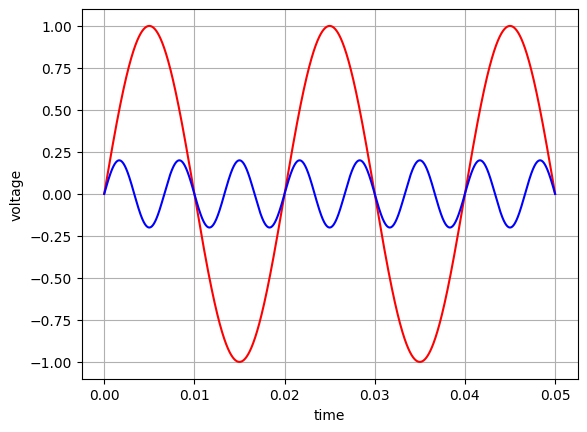

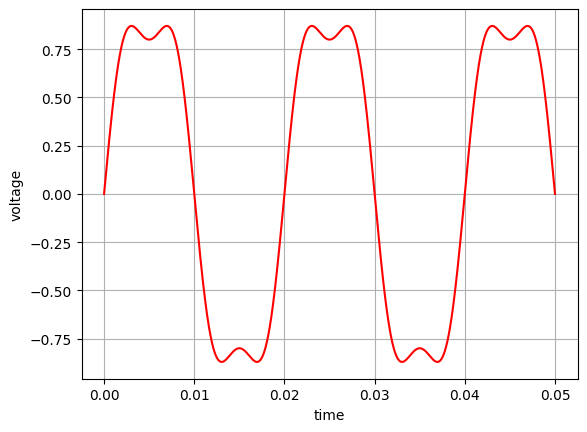

In [17]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Constants
fs = 50

# Transient time
t = np.linspace(0, 50e-3, num=10000)


# Functions
x = np.sin(2*math.pi*fs*t)
x_3 = 0.2 * np.sin(2*math.pi*3*fs*t)


# Plotting
plt.plot(t, x, 'r')
plt.plot(t, x_3, 'b')
plt.xlabel('time')
plt.ylabel('voltage')
plt.grid()
plt.show()

plt.plot(t, x+x_3, 'r')
plt.xlabel('time')
plt.ylabel('voltage')
plt.grid()
plt.show()

## SVPWM Switching

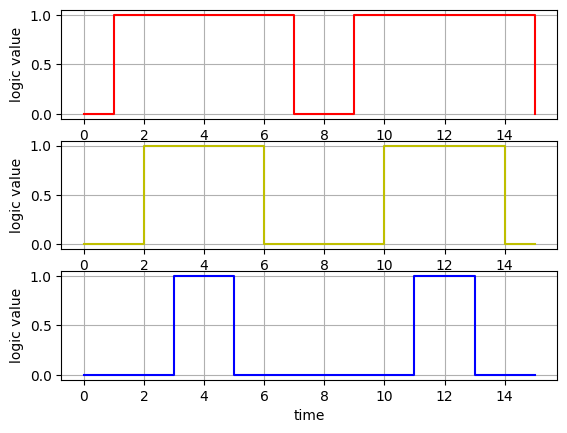

In [42]:
import numpy
import matplotlib.pyplot as plt


# Signals
#t = np.repeat(np.linspace(0, 2e-3, num=8), 2)

A = np.tile([0, 1, 1, 1, 1, 1, 1, 0], 2)
B = np.tile([0, 0, 1, 1, 1, 1, 0, 0], 2)
C = np.tile([0, 0, 0, 1, 1, 0, 0, 0], 2)

# Plotting
plt.subplot(3,1,1)
plt.step(A, 'r', where='post')
plt.xlabel('time')
plt.ylabel('logic value')
plt.grid()

plt.subplot(3,1,2)
plt.step(B, 'y', where='post')
plt.xlabel('time')
plt.ylabel('logic value')
plt.grid()

plt.subplot(3,1,3)
plt.step(C, 'b', where='post')
plt.xlabel('time')
plt.ylabel('logic value')
plt.grid()

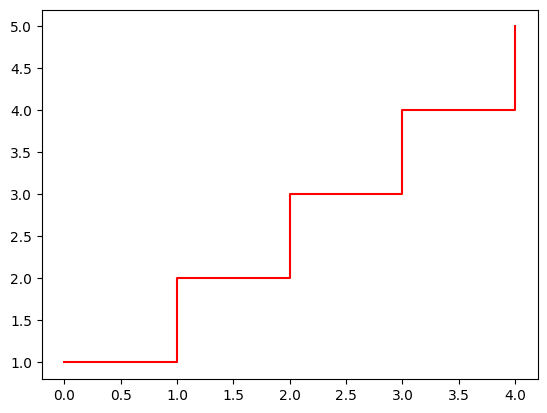

In [41]:
x = [1, 2, 3, 4, 5]
plt.step(x, 'r', where='post')